# Satellitengeodäsie - Übung 1
***

#### Libraries

In [304]:
%matplotlib inline
import numpy as np
from numpy import sin, cos
import math
import matplotlib.pyplot as plt
import itertools
import nbconvert

#### Daten einlesen

In [305]:
#Read files
satellites = {"GPS 07" : np.loadtxt(r"/Users/Dario/OneDrive - ETH Zurich/01_HS21/Satellitengeodäsie/Uebung_01/Data/PG07asc.sec"),
              "GLONASS 07" : np.loadtxt(r"/Users/Dario/OneDrive - ETH Zurich/01_HS21/Satellitengeodäsie/Uebung_01/Data/PR07asc.sec"),
              "GALLILEO 07" : np.loadtxt(r"/Users/Dario/OneDrive - ETH Zurich/01_HS21/Satellitengeodäsie/Uebung_01/Data/PE07asc.sec"),
              "QZSS 03" : np.loadtxt(r"/Users/Dario/OneDrive - ETH Zurich/01_HS21/Satellitengeodäsie/Uebung_01/Data/PJ03asc.sec"),
              "Beidou 07" : np.loadtxt(r"/Users/Dario/OneDrive - ETH Zurich/01_HS21/Satellitengeodäsie/Uebung_01/Data/PC07asc.sec"),
              "Lageos 1" : np.loadtxt(r"/Users/Dario/OneDrive - ETH Zurich/01_HS21/Satellitengeodäsie/Uebung_01/Data/PL52asc.sec")
             }

### Konstanten

In [306]:
WE = 7.292115*10**(-5) #sec^(-1)
RE = 6378.137 #km
XP = (-0.1)/(3600) #''
YP = (0.4)/(3600) #''
T = 0
WETTZELL = {"length": 12 * np.pi/180 + 53 * np.pi / (60*180), "width": 49 * np.pi/180 + 9 * np.pi / (60*180), "h": 670}



### Für 3D Plots

In [307]:
#for 3D Plots
def plotSatPos3D(sat,name,system,x,y,z):
    fig = plt.figure(figsize = (14,8))
    #ax = fig.add_subuplot(111, projection='3d')
    ax = plt.axes(projection='3d')
    
    ax.set_xlabel('[X] km')
    ax.set_ylabel('[Y] km')
    ax.set_zlabel('[Z] km')
    plt.title(name + ' : ' + 'Position' +system)
    
    zline = x
    xline = y
    yline = z
    ax.plot3D(xline, yline, zline, 'blue')

### Für 2D Plots

In [308]:
#for 2D Plots
def plotSat2D(name,l,b,min_width,max_width):
    fig = plt.figure(figsize = (8,6))
    plt.scatter(l,b)
    
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    
    
    # naming the x axis
    plt.xlabel('Längengrad')
    
    # naming the y axis
    plt.ylabel('Breitengrad')
 
    # giving a title to my graph
    plt.title(name + " : " + "Bodenspur")
    
    #min and max width
    plt.figtext(0.1 , 0.001, "Minimale Breite: " + str(min_width) + "°" + "\nMaximale Breite: " + str(max_width) + "°")
    
    

### Rotationsmatrizen

In [309]:
def R1(a):
    return np.matrix([[1,0,0],
                     [0, cos(a), sin(a)],
                     [0, -sin(a), cos(a)]])

def R2(a): 
    return np.matrix([[cos(a),0,-sin(a)],
                     [0, 1, 0],
                     [sin(a),0, cos(a)]])
def R3(a):
    return np.matrix([[cos(a), sin(a), 0],
                     [-sin(a), cos(a), 0],
                     [0, 0, 1]])

### Transormationen

In [310]:
def erdrotation(coordInertial, theta):
    r = R3(theta)
    return coordInertial.dot(r)
        
def polbewegung(wahres_erd_sys, XP, YP):
    w = R2(-XP).dot(R1(-YP))
    return wahres_erd_sys.dot(w)

def inertialZuErd(coordInertial, T, WE, XP, YP):
    theta = WE * T
    
    wahres_erd_sys = erdrotation(coordInertial, theta) 
    konv_erd_sys = polbewegung(wahres_erd_sys, XP, YP)
    
    return konv_erd_sys

***
## Aufgabe 1: Satelliten im Inertialsystem plotten

In [311]:
def task1():
    for i in satellites:
        name = i
        sat = satellites[name]
        
        x = []
        y = []
        z = []
        
        for j in sat: 
            x.append(j[0])
            y.append(j[1])
            z.append(j[2])
        plotSatPos3D(sat,name," im Inertialsystem",x,y,z)
        
        
        
        
        
        
        

***
## Aufgabe 2: Satelliten im erdfesten System plotten

In [328]:
def task2():
    for i in satellites:
        sat = satellites[i]
        T = 0
        x = []
        y = []
        z = []
        
        for j in sat:
            koord_erdfest = inertialZuErd(j, T, WE, XP, YP)
            
            x.append(koord_erdfest[0,0])
            y.append(koord_erdfest[0,1])
            z.append(koord_erdfest[0,2])
            
            if(i == "Lageos 1"):
                T += 120
            else:
                T += 300
            
        plotSatPos3D(sat,i," im erdfesten System",x,y,z)
        
        
        
        

***
## Aufgabe 3: Breitenspur der Satelliten im erdfesten System plotten

In [322]:
def length(x,y):
    l = math.atan2(x,y)*(180/np.pi)
    return l
    
    
def width(x,y,z):
    ww = math.sqrt((x**2)+(y**2))
    #w = math.atan(z/(math.sqrt((x**2)+(y**2))))*(180/np.pi)
    w = math.atan2(z,ww)*(180/np.pi)
    return w

def task3():
    for i in satellites:
        sat = satellites[i]

        T = 0
        length1 = []
        width1 = []
        
        for j in sat:
            koord_erdfest = inertialZuErd(j, T, WE, XP, YP)
            
            x = koord_erdfest[0,0]
            y = koord_erdfest[0,1]
            z = koord_erdfest[0,2]
            
            length1.append(length(x,y))
            width1.append(width(x,y,z))
            
            if(i == "Lageos 1"):
                T += 120
            else:
                T += 300
                
                
        min_width = round(min(width1),3)
        max_width = round(max(width1), 3)
    
        
        plotSat2D(i,length1,width1,min_width, max_width)
        
        
        

***
#### Für Polarplots

In [323]:
def polarPlot(name, desc, az, el):
    
    fig, ax = plt.subplots(1,1, figsize=(8,8), subplot_kw=dict(projection='polar'))

    plt.scatter(az, el, color='blue', label=name)

    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    #plt.figtext(0.54, 0.5, "Elevation", rotation=62.5)
    plt.ylim(90,0)
    plt.title(name + " " + desc)

#### Transformation erdfestes System zu topozentrisches System 

In [334]:
def ErdfestTopo(coordInertial):
    T = 0
    n = []
    e = []
    u = []

    x0 = RE * cos(WETTZELL["width"]) * cos(WETTZELL["length"])
    y0 = RE * cos(WETTZELL["width"]) * sin(WETTZELL["length"])
    z0 = RE * sin(WETTZELL["width"])
    p0 = np.matrix([x0, y0, z0])

    r2 = R2((np.pi/2) - WETTZELL["width"])
    r3 = R3(WETTZELL["length"])
    matrix = np.matrix([[1, 0, 0], [0, 1, 0], [0, 0, -1]])

    for coord in coordInertial:
        c = inertialZuErd(coordInertial, T * np.pi/180 , WE, XP, YP)
        r4 = (c - p0).transpose()
        c_copy = matrix @ r2 @ r3 @ r4
        T += 300 # T:GNSS

        n.append(c_copy[0,0])
        e.append(c_copy[1,0])
        u.append(c_copy[2,0])

    return n, e, u

## Aufgabe 4: Polarplot, Elevation und Zeitintervalle
***

In [335]:
def task4():
    sat = satellites["GPS 07"]

    n, e, u = ErdfestTopo(sat)
    T = 0
    az = []
    el = []
    
    for (ni, ei, ui) in itertools.zip_longest(n, e, u):
        if ui < 0: # below horizon
            continue 
        azimuth = math.atan2(ei, ni) * (180 / math.pi)
        elevation = (math.pi / 2 - math.atan(math.sqrt((ni ** 2) + (ei ** 2)) / ui)) * 180 / math.pi
        zenit = math.atan2(math.sqrt((ni**2) + (ei**2)), ui) * (180 / math.pi) 
        el.append(elevation)
        az.append(azimuth * math.pi / 180)
    
    polarPlot("GPS 07",": Polarplot von Wettzell", az, el)   
    
    
    

***
## Run all Tasks

In [336]:
def runTasks():
    task1()
    task2()
    task3()
    task4()

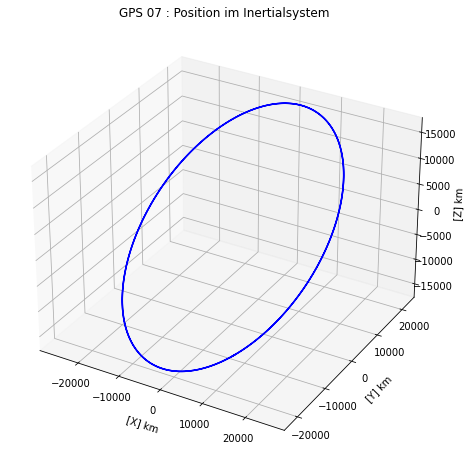

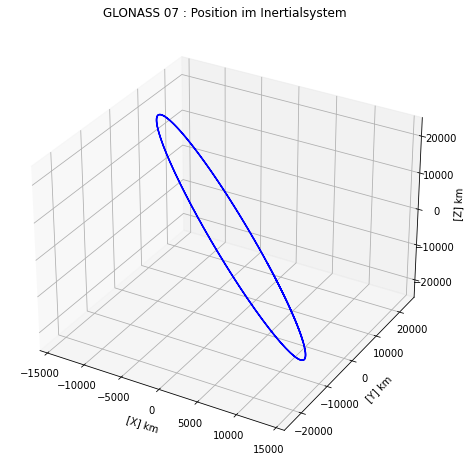

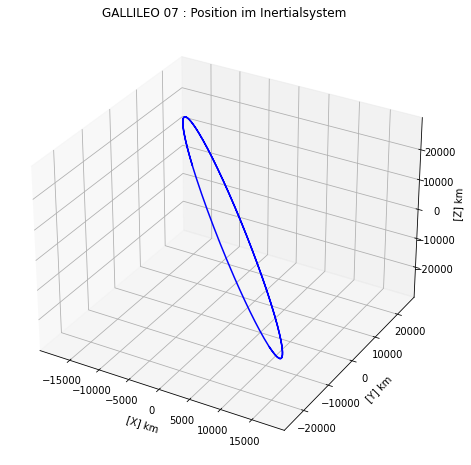

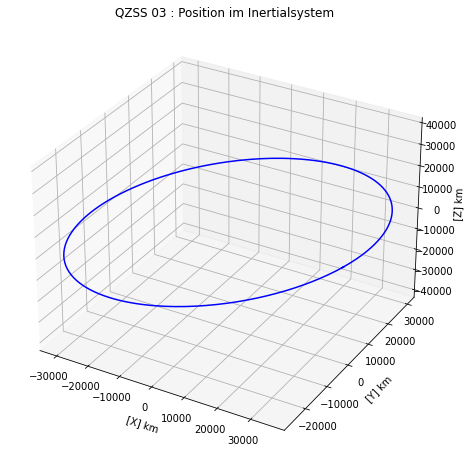

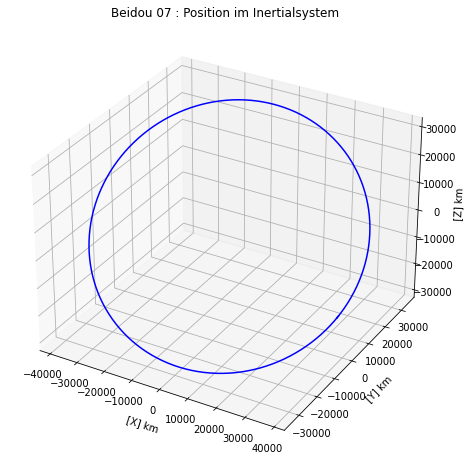

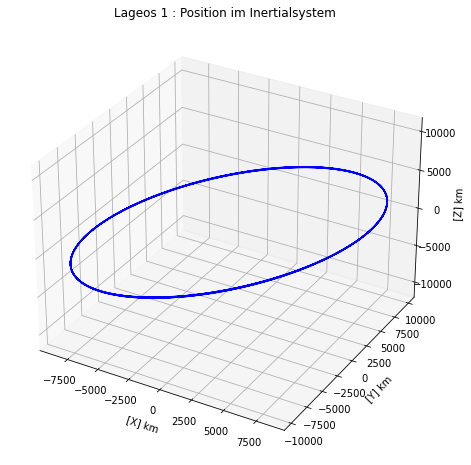

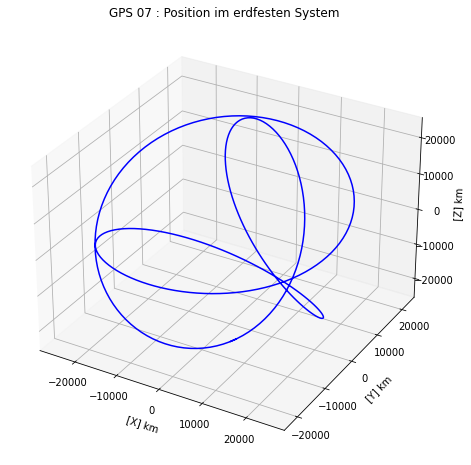

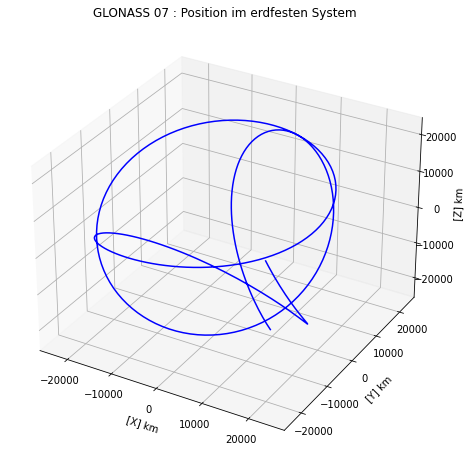

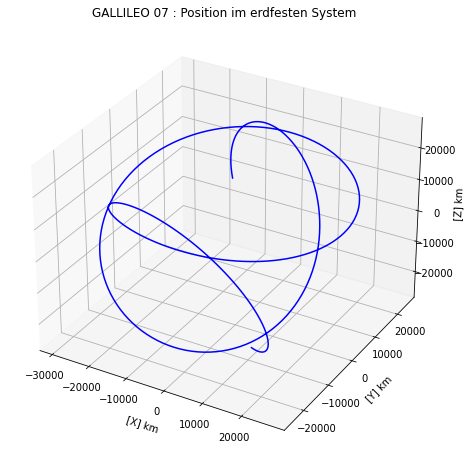

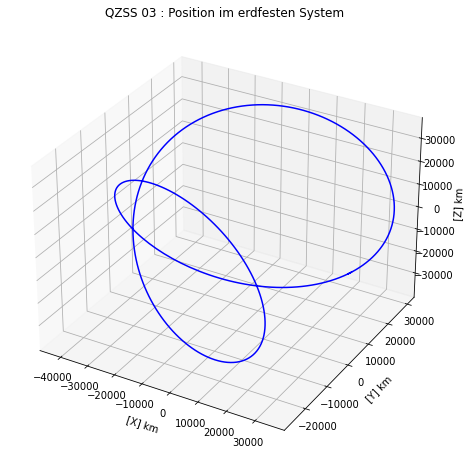

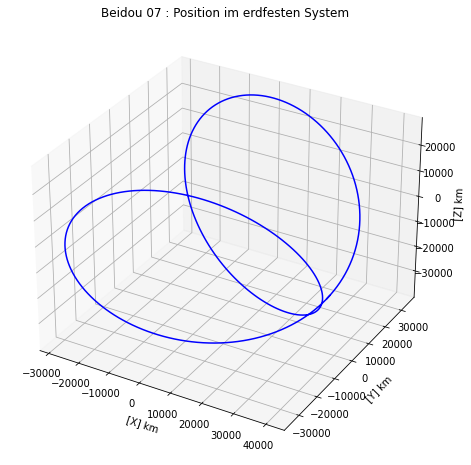

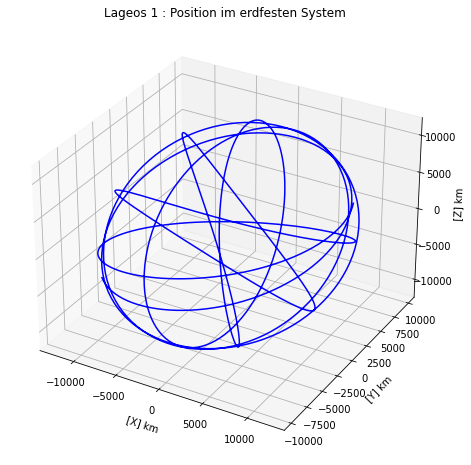

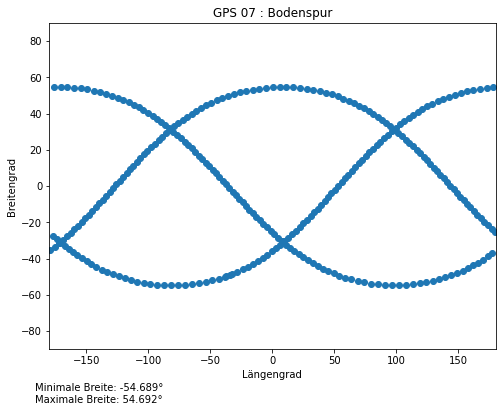

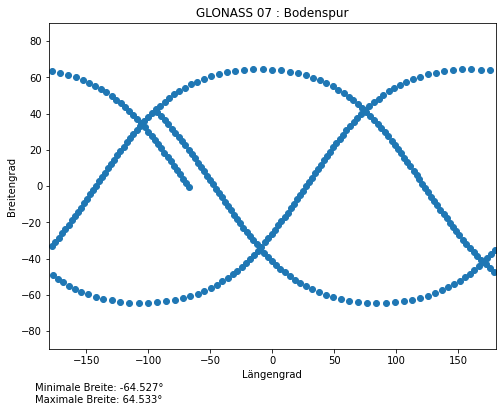

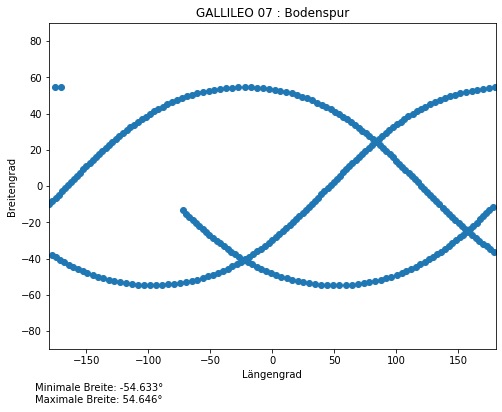

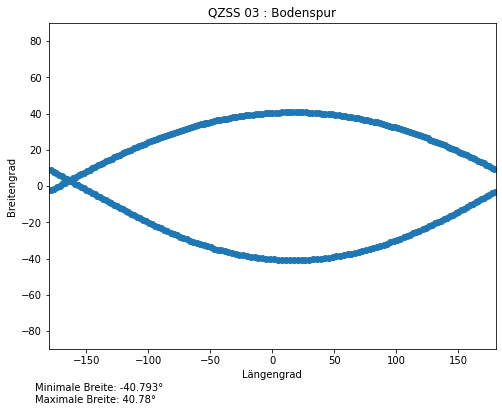

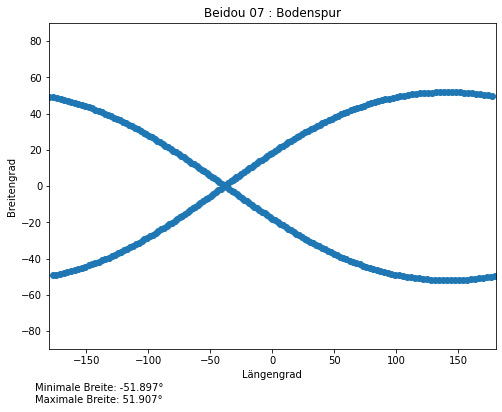

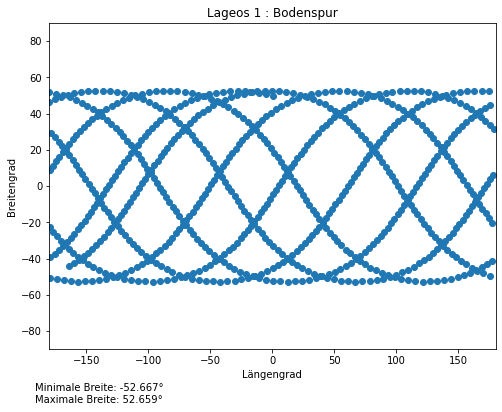

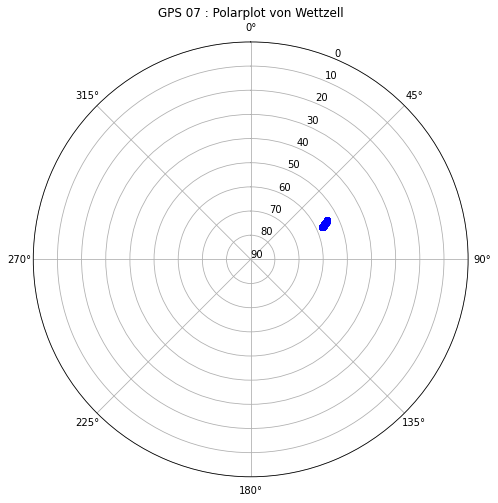

In [337]:
runTasks()